In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**Load dataset**

In [3]:
train = pd.read_csv('train-Copy1.csv')

**Cek isi Dataset**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Data Exploration

## Target : Response

,Response,count,persentase
0,0,334399,87.74
1,1,46710,12.26


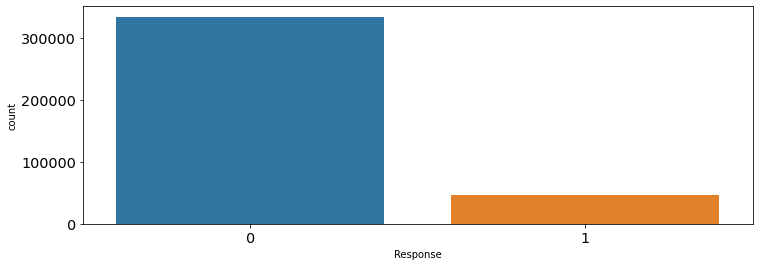

In [5]:
g = train['Response'].value_counts().reset_index()
g = g.rename(columns={'Response' : 'count', 'index' : 'Response'})
g['persentase'] = round((g['count']/train['Response'].count())*100,2)
display(g)

y = g['persentase']
sns.barplot(x='Response', y='count', data=g);

Dari plot diperoleh bahwa terjadi class imbalance : customer yang tidak interested jauh lebih banyak dibandingkan customer yang interested. Customer yang interested 87%. 

## Gender Variable 

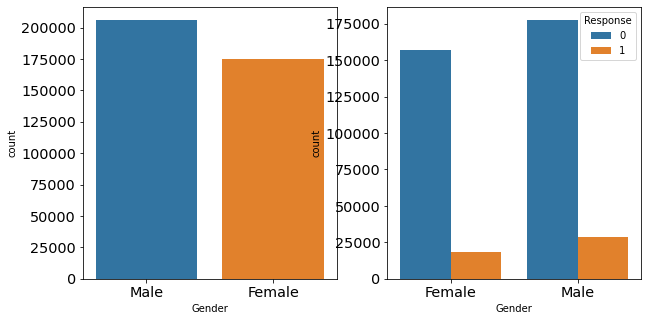

In [6]:
gen = train.groupby(['Gender', 'Response'])['id'].count().to_frame().rename(columns={'id' : 'count'}).reset_index()

fig, ax = plt.subplots(1,2, figsize=(10,5))
af = sns.countplot(x='Gender', data=train, ax = ax[0])
bf = sns.barplot(x='Gender', y='count', data = gen, hue='Response', ax= ax[1])

* Variabel gender dalam dataset dapat dikatakan seimbang (terdistribusi secara merata)
* Gender Male sedikit lebih banyak daripada Female dan yg interested terhadap Asuransi Kendaraan juga sedikit lebih tinggi.

## Age Variable

<Figure size 720x576 with 0 Axes>

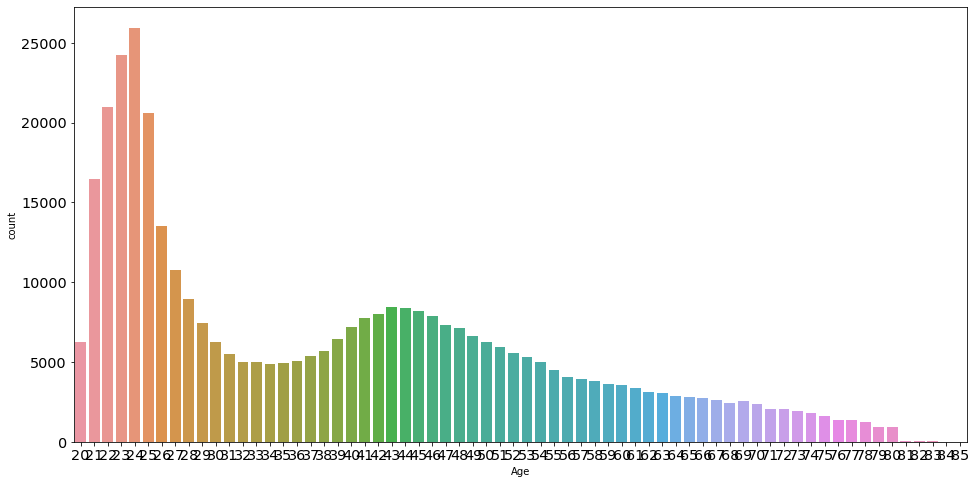

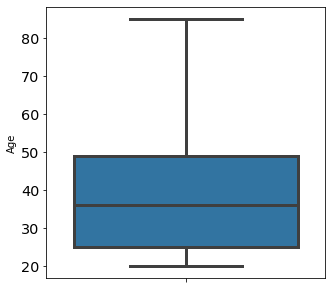

In [7]:
plt.figure(figsize=(10,8))
plt.subplots(1,1, figsize = (16,8))
age1 = sns.countplot(x = 'Age', data=train);

plt.subplots(1,1, figsize = (5,5))
age2 = sns.boxplot(y = 'Age', data=train);

#plt.subplots(1,1, figsize = (16,8))
#age3 = sns.distplot(train['Age']);


* Data didominasi oleh customer usia 21 - 28. 
* Customer terbanyak yaitu customer usia 24 tahun. 
* Dari boxplot customer, dapat dilihat bahwa tidak ada outliers. 

## Driving License Variable 

,Driving_License,Response,id
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


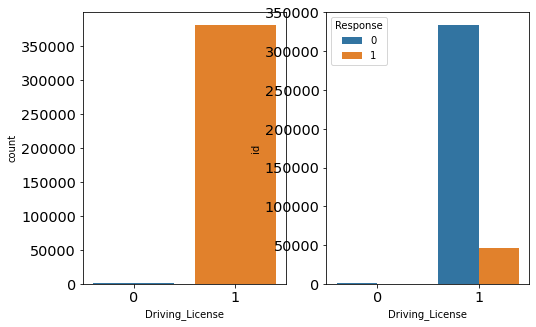

In [8]:
dr = train.groupby(['Driving_License', 'Response'])['id'].count().reset_index()
display(dr)

figd,ax = plt.subplots(1,2, figsize = (8,5))
axdr1 = sns.countplot(x='Driving_License', data=train, ax=ax[0])
axdr2 = sns.barplot(x='Driving_License', y ='id', hue='Response', data = dr, ax = ax[1])

* Lebih dari 99 % customer memiliki driving license 
* Customer yang memiliki driving license cenderung berminat dengan asuransi kendaraan

## Region Code Variable

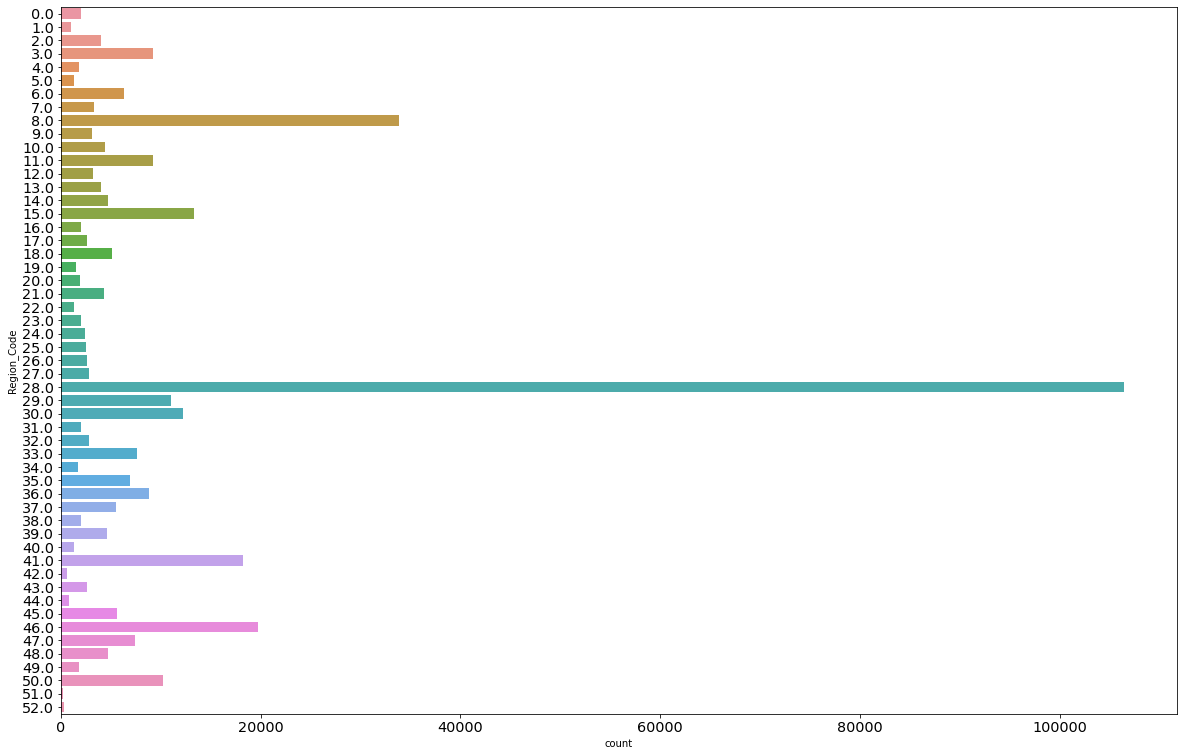

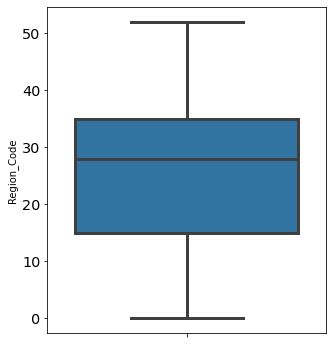

In [9]:
plt.subplots(1,1, figsize = (20,13))
figreg1 = sns.countplot(y='Region_Code', data=train)

plt.subplots(1,1, figsize = (5,6))
figreg2 = sns.boxplot(y='Region_Code', data=train)

* Jumlah customer pada Region code 28 jauh lebih banyak dibandingkan wilayah lainnya .
* Dari boxplot diperoleh tidak ada outlier. 

## Previously Insured Variable 

,Previously_Insured,Response,count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


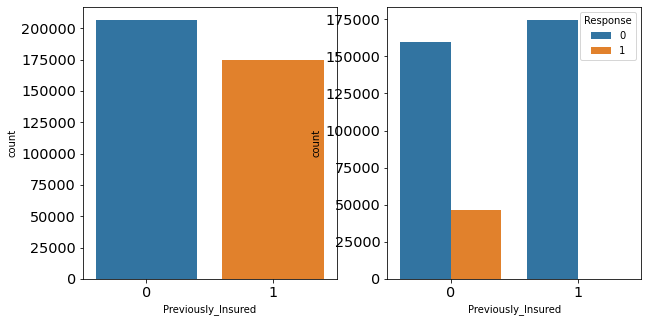

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
figpi1 = sns.countplot(x='Previously_Insured', data=train, ax = ax[0])
pi = train.groupby(['Previously_Insured', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
figpi2 = sns.barplot(x='Previously_Insured', y = 'count', hue='Response', data= pi, ax = ax[1])
display(pi)

* Customer yang sebelumnya sudah memiliki asuransi kendaraan dan yang belum hampir sama jumlahnya. 
* Customer yang sebelumnya sudah pernah memiliki asuransi kendaraan cenderung tidak berminat dengan asuransi kendaraan. Sebaliknya, Customer yang belum memiliki asuransi kendaraan kemungkinan berminat membeli polis asuransi kendaraan.

## Vehicle Age Variable 

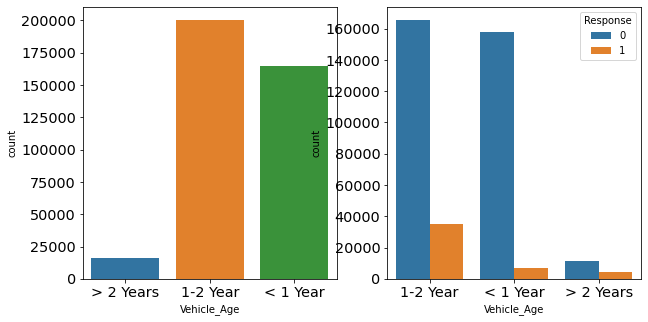

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
figva1 = sns.countplot(x='Vehicle_Age', data=train, ax = ax[0])
pi = train.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
figva2 = sns.barplot(x='Vehicle_Age', y = 'count', hue='Response', data= pi, ax = ax[1])

* Junmlah customer dengan usia kendaraan lebih dari 2 tahun sangat sedikit.
* Customer dengan usia kendaraan 1-2 tahun cenderung lebih tertarik dibandingkan dnegan customer dengan usia kendaraan <1 tahun dan > 2 tahun.

## Vechicle damage

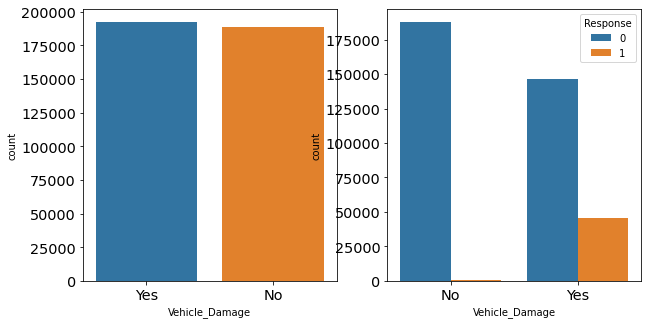

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
figvd1 = sns.countplot(x='Vehicle_Damage', data=train, ax = ax[0])
pi = train.groupby(['Vehicle_Damage', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
figvd2 = sns.barplot(x='Vehicle_Damage', y = 'count', hue='Response', data= pi, ax = ax[1])

* Jumlah customer dengan kendaraan pernah rusak dan tidak pernah rusak relatif seimbang. 
* Customer yang kendaraannya pernah rusak kemungkinan berminat dengan asuransi kendaraan. 

## Annual Premium Variable

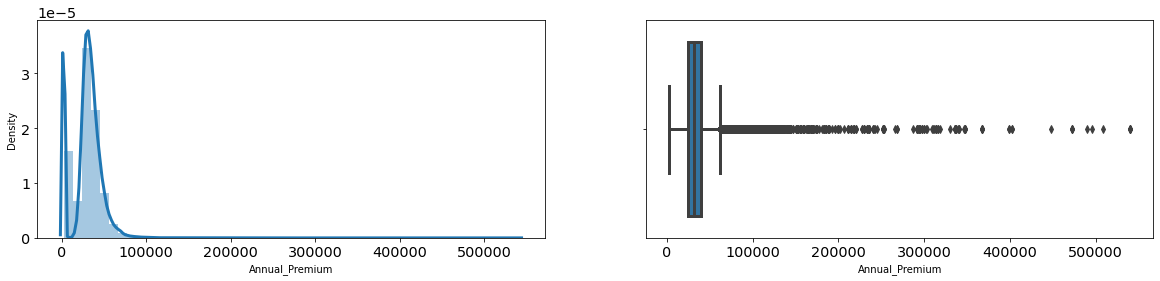

In [13]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
figap1 = sns.distplot(train['Annual_Premium'], ax = ax[0])
figap2 = sns.boxplot(x='Annual_Premium', data=train, ax = ax[1])

* Dari histogram, dapat dilihat bahwa distribusi premi tahunan positively skewed. 
* Dari boxplot, dapat dilihat bahwa banyak outlier dari variabel annual premium. 

## Policy Sales Channel Variable

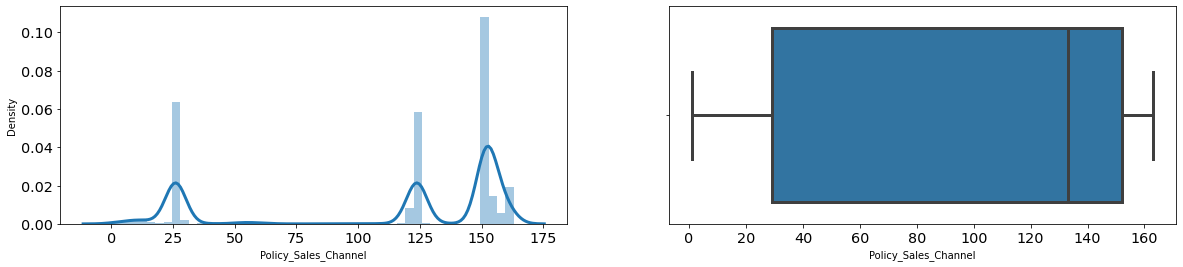

In [14]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
figap1 = sns.distplot(train['Policy_Sales_Channel'], ax = ax[0])

#plt.subplots(1,1, figsize=(10,4))
figap2 = sns.boxplot(x='Policy_Sales_Channel', data=train, ax = ax[1])

## Vintage Number of Days

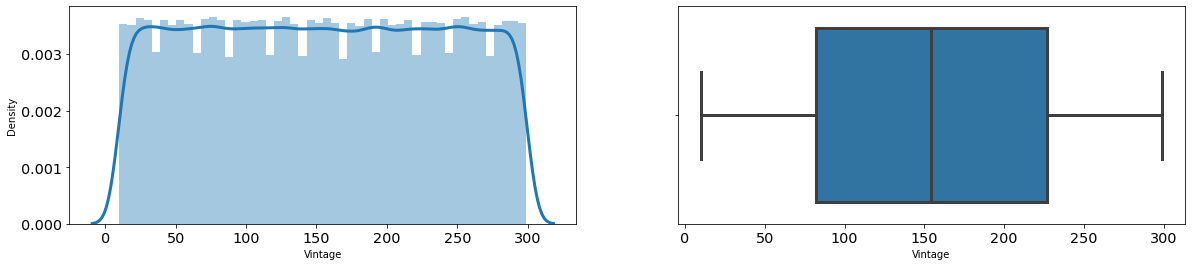

In [15]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
figap1 = sns.distplot(train['Vintage'], ax = ax[0])

#plt.subplots(1,1, figsize=(10,4))
figap2 = sns.boxplot(x='Vintage', data=train, ax = ax[1])

* Dapat dilihat dari boxplot bahwa tidak ada outliers pada variabel vintage. 

# EDA

**Pisahkan feature numerik dan kategori**

In [17]:
nums = ['Age', 'Driving_License', 'Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel',
       'Vintage','Response']

cats = ['Gender','Vehicle_Age','Vehicle_Damage']

## Descriptive Statistics

### Statistical Summary Feature Numerik

In [18]:
train[nums].describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Statistical Summary Feature Kategori

In [19]:
train[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


### Value Counting

In [20]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train[col].value_counts())
    print()

Value count kolom Gender:
Male      206089
Female    175020
Name: Gender, dtype: int64

Value count kolom Vehicle_Age:
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Value count kolom Vehicle_Damage:
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64



* Customer berusia 20 hingga 85 tahun
* Terdapat 53 `Region_Code`
* Lama waktu customer memiliki asuransi di perusahaan yaitu 10 hari sampai 299 hari.
* Distribusi `Gender` dan `Vehicle Damage` relatif seimbang
* Customer yang usia kendaraanya lebih dari 2 tahun sangat sedikit.

## Univariate Analysis 

### Boxplot 

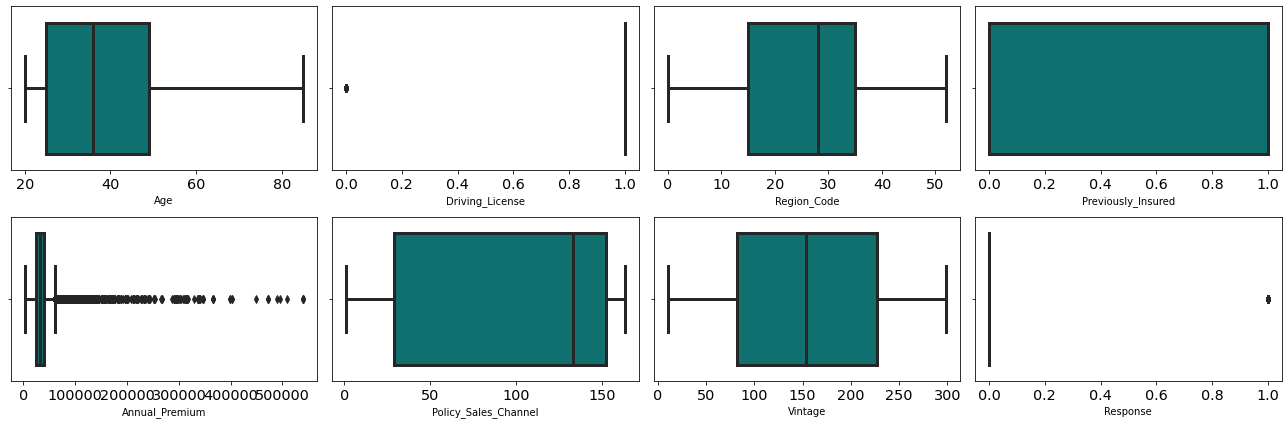

In [21]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(18, 6))
for i in range(0, len(nums)):
    plt.subplot(2, np.ceil(len(nums)/2), i+1)
    sns.boxplot(train[nums[i]], color='teal', orient='v')
    plt.tight_layout()

### Distplots

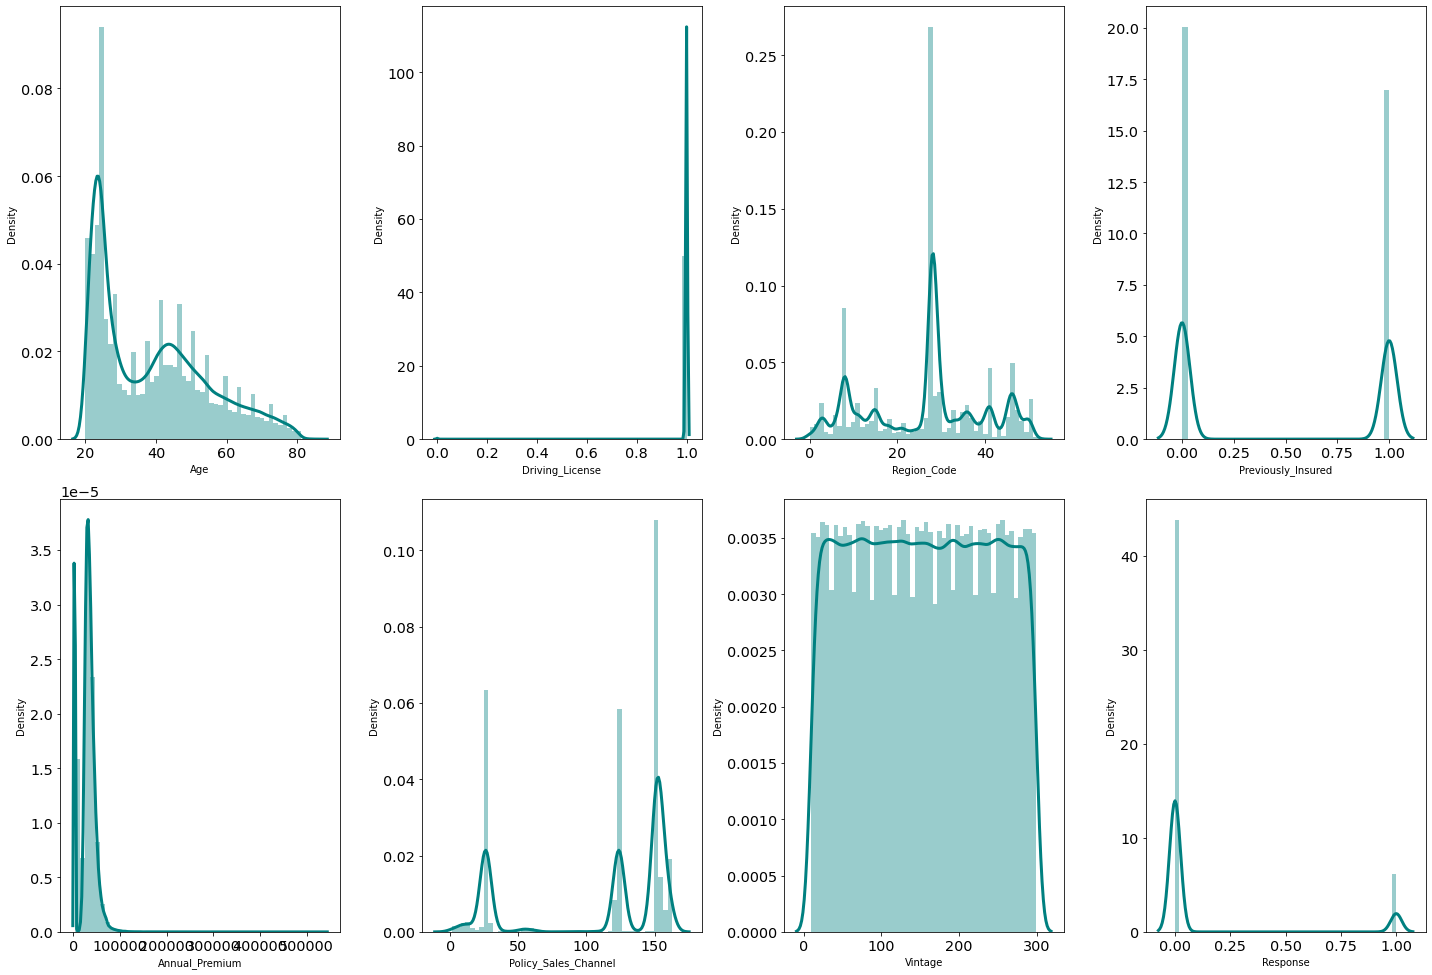

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 20))
for i in range(0, len(nums)):
    plt.subplot(3, np.ceil(len(nums)/2), i+1)
    sns.distplot(train[nums[i]], color='teal')
    plt.tight_layout()

### Countplot

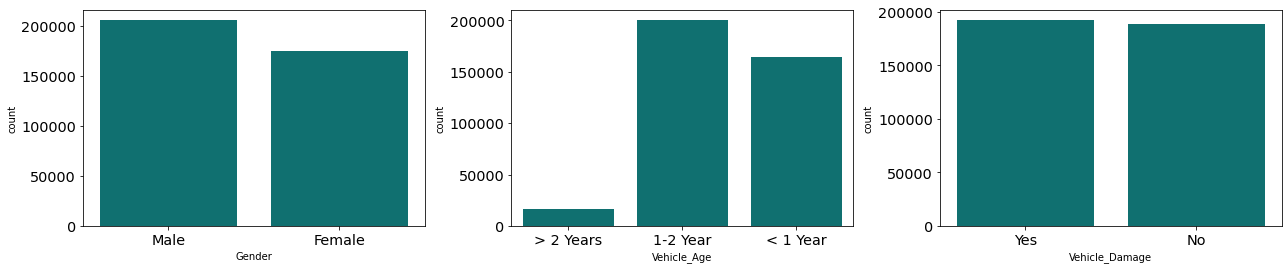

In [23]:
plt.figure(figsize=(18,7))
for i in range(0, len(cats)):
    plt.subplot(2, len(cats), i+1)
    sns.countplot(train[cats[i]], color='teal', orient='v')
    plt.tight_layout()

## Bivariate Analysis

### Correlation Heatmap

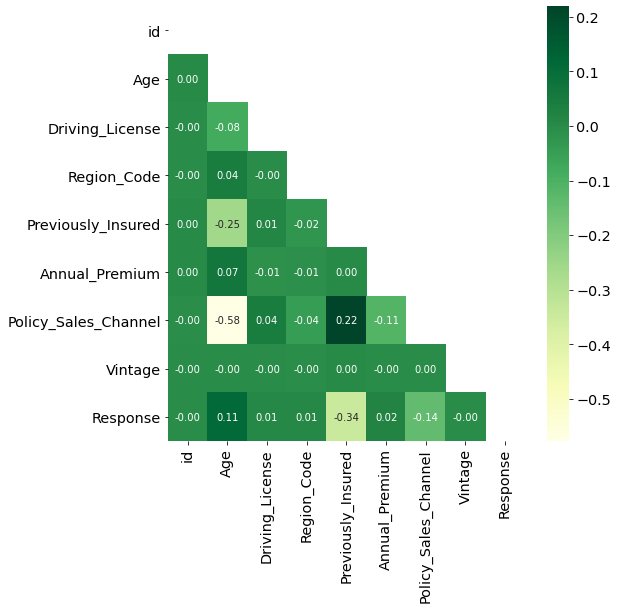

In [24]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(), cmap='YlGn', mask=mask, annot=True, fmt='.2f');

### Pairplot

<Figure size 1440x1440 with 0 Axes>

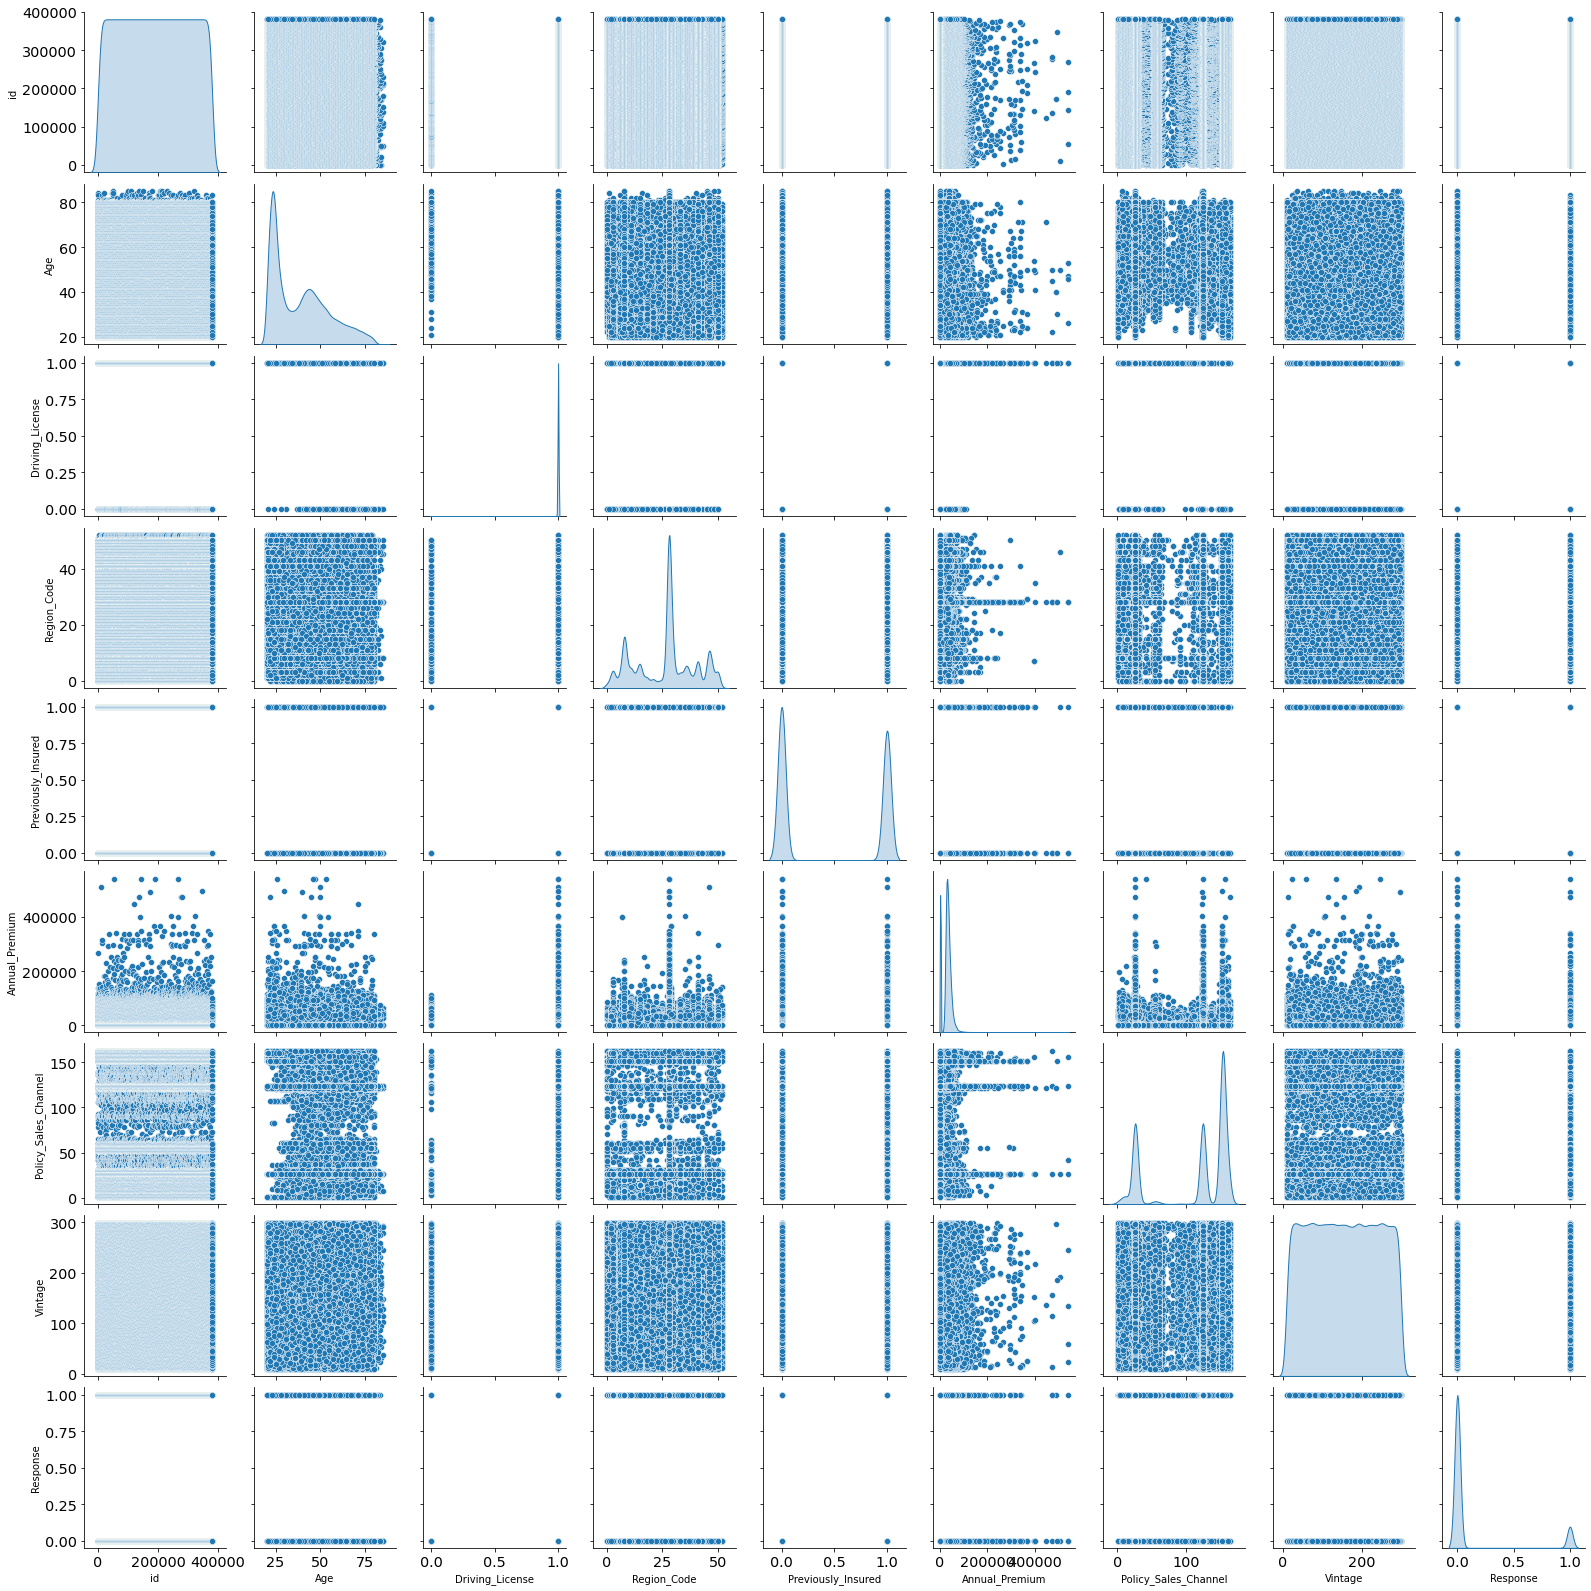

In [25]:
plt.figure(figsize=(20, 20))
sns.pairplot(train, diag_kind='kde')

### Category Plots

## EDA Conslusion

* Terjadi class imbalance pada distribusi data target `Response` antara customer yang berminat dan tidak berminat Asuransi Kendaraan sehingga perlu dilakukan Oversampling atau Undersampling. 
* Distribusi `Gender`, `Previously Insured`, `Vehicle Damage` relatif seimbang.
* Customer terbanyak yaitu customer `usia` 24 tahun.
* Lebih dari 99 % customer memiliki `Driving License` dan Customer yang memiliki driving license cenderung berminat dengan asuransi kendaraan
* Jumlah customer pada `Region Code` 28 jauh lebih banyak dibandingkan wilayah lainnya .
* `Previously Insured` : Customer yang sebelumnya sudah pernah memiliki asuransi kendaraan cenderung tidak berminat dengan asuransi kendaraan. Sebaliknya, Customer yang belum memiliki asuransi kendaraan kemungkinan berminat membeli polis asuransi kendaraan.
* `Vehicle Age` : Junmlah customer dengan usia kendaraan lebih dari 2 tahun sangat sedikit.
* Customer dengan usia kendaraan 1-2 tahun cenderung lebih tertarik dibandingkan dnegan customer dengan usia kendaraan <1 tahun dan > 2 tahun.
* `Vehicle Damage` : Customer yang kendaraannya pernah rusak kemungkinan berminat dengan asuransi kendaraan. 
* `Annual Premium` :  distribusi premi tahunan positively skewed dan terdapat banyak outlier.

# Data Preprocessing

In [4]:
df = pd.read_csv('train-Copy1.csv', index_col='id')

In [5]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

## Check Missing Value 

In [28]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* Tidak ada missing value 

## Check Duplicate Data

In [29]:
train.duplicated().sum()

0

* Tidak ada data duplikat

## Feature Engineering

**Klasifikasi Annual Premium**

In [11]:
#df['Premi'] = np.where(df.Annual_Premium <= 20000,'low_premi',np.where(df.Annual_Premium <= 40000,'medium_premi',np.where(df.Annual_Premium <= 60000,'high_premi','very_high_premi')))

In [4]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License']
numeric = ['Age','Vintage','Annual_Premium']

# Modelling & Evaluation

**Define Target & Variable**

In [23]:
X= df.drop(columns='Response')
y= df.Response

In [54]:
from imblearn import over_sampling, under_sampling

X, y = under_sampling.RandomUnderSampler().fit_resample(X, y)

In [24]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

**Split Train Test**

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from scipy.stats import uniform
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',XGBClassifier(n_jobs=-1,random_state=42))
])

model = RandomizedSearchCV(pipline,rsp.xgb_params,cv=3,n_jobs=-1,verbose=1,n_iter=100,random_state=42)
model.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.preprocessing import QuantileTransformer

In [14]:
df['Premium_tr'] = QuantileTransformer(output_distribution='uniform').fit_transform(df['Annual_Premium'].values.reshape(len(df), 1))

<AxesSubplot:xlabel='Premium_tr'>

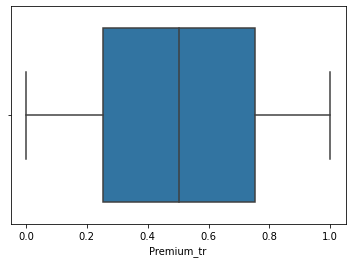

In [18]:
sns.boxplot(x = 'Premium_tr', data=df)


<AxesSubplot:xlabel='Premium_tr', ylabel='Density'>

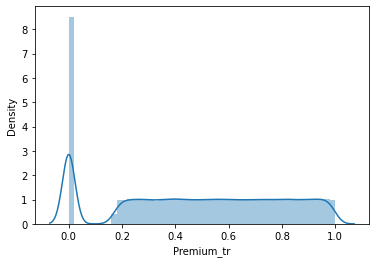

In [17]:
sns.distplot(df['Premium_tr'])

In [21]:
df.Premium_tr

id
1         0.774918
2         0.570263
3         0.722774
4         0.384563
5         0.344111
            ...   
381105    0.443443
381106    0.765694
381107    0.624946
381108    0.851868
381109    0.802508
Name: Premium_tr, Length: 381109, dtype: float64

In [27]:
numeric = ['Age','Vintage','Premium_tr']

In [22]:
X= df.drop(columns='Response')
y= df.Response

In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((304887, 11), (76222, 11), (304887,), (76222,))

In [24]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',LogisticRegression(n_jobs=-1,random_state=42))
])
model_LR = pipline
model_LR.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Premium_tr']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one_hot

In [25]:
print(model_LR.score(X_train, y_train),model_LR.score(X_test, y_test))
y_pred = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

0.877974462669776 0.8750360788223872
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



In [29]:
from sklearn.tree import DecisionTreeClassifier
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',DecisionTreeClassifier(random_state=42))
])
model_DecisionTree = pipline
model_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Premium_tr']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one_hot

In [30]:
print(model_DecisionTree.score(X_train, y_train),model_DecisionTree.score(X_test, y_test))
y_pred = model_DecisionTree.predict(X_test)
print(classification_report(y_test, y_pred))

0.9998852033704291 0.8220592479861457
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.29      0.30      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



In [19]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License']
numeric = ['Age','Vintage','Annual_Premium']

In [8]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',XGBClassifier(n_jobs=-1,random_state=42))
])
model_xgboost = pipline
model_xgboost.fit(X_train,y_train)

[17:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [11]:
print(model_xgboost.score(X_train, y_train),model_xgboost.score(X_test, y_test))
y_pred = model_xgboost.predict(X_test)
print(classification_report(y_test, y_pred))

0.8811887682977628 0.8745900133819632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.46      0.02      0.05      9523

    accuracy                           0.87     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.83      0.87      0.82     76222



In [25]:
from imblearn import over_sampling, under_sampling

X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

In [32]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',LogisticRegression(n_jobs=-1,random_state=42))
])
model_LR = pipline
model_LR.fit(X_under,y_under)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Premium_tr']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one_hot

In [41]:
print(model_LR.score(X_train, y_train),model_LR.score(X_test, y_test))
y_pred = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

0.6433137523082322 0.645640366298444
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.25      0.95      0.40      9523

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.65      0.70     76222



In [26]:
from sklearn.tree import DecisionTreeClassifier
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',DecisionTreeClassifier(random_state=42))
])
model_DecisionTree = pipline
model_DecisionTree.fit(X_under,y_under)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [40]:
print(model_DecisionTree.score(X_train, y_train),model_DecisionTree.score(X_test, y_test))
y_pred = model_DecisionTree.predict(X_test)
print(classification_report(y_test, y_pred))

0.7898893688481307 0.7218388391802891
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     66699
           1       0.27      0.71      0.39      9523

    accuracy                           0.72     76222
   macro avg       0.61      0.72      0.60     76222
weighted avg       0.86      0.72      0.77     76222



In [27]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License']
numeric = ['Age','Vintage','Annual_Premium']

In [28]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',XGBClassifier(n_jobs=-1,random_state=42))
])
model_xgboost = pipline
model_xgboost.fit(X_under,y_under)

[20:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [29]:
print(model_xgboost.score(X_train, y_train),model_xgboost.score(X_test, y_test))
y_pred = model_xgboost.predict(X_test)
print(classification_report(y_test, y_pred))

0.7114439120067435 0.7088504631208837
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66699
           1       0.29      0.92      0.44      9523

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222



karena xboost menghasilkan f1-score tertinggi, sehingga akan dilakukan percobaan untuk menaikan f1-score dengan melakukan tuning.

In [51]:
rsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',RandomForestClassifier(n_jobs=-1,random_state=42))
])

best_model_xg = RandomizedSearchCV(pipline,rsp.rf_params,cv=5,n_jobs=-1,verbose=1,n_iter=100,random_state=42)
best_model_xg.fit(X_under,y_under)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 16.4min


In [43]:
print(best_model.score(X_train, y_train),best_model.score(X_test, y_test))
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

0.6984456536356093 0.6971215659520873
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.93      0.43      9523

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



In [46]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',RandomForestClassifier(n_jobs=-1,random_state=42))
])

best_model = RandomizedSearchCV(pipline,rsp.rf_params,cv=3,n_jobs=-1,verbose=1,n_iter=100,random_state=42,scoring='f1')
best_model.fit(X_under,y_under)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.4min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Age',
                                                                                'Vintage',
                                                                                'Annual_Premium']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(stra

In [47]:
print(best_model.score(X_train, y_train),best_model.score(X_test, y_test))
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

0.4349317173306455 0.4346931779225232
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.93      0.43      9523

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



In [6]:
df2 = df.copy()

In [8]:
vehicle_damage = {'Yes': 1, 'No': 0}

df2['Vehicle_Damage'] = df2['Vehicle_Damage'].replace(vehicle_damage)

In [9]:
df2['Vehicle_Damage_mult_Previously_Insured'] = df2['Vehicle_Damage']*df2['Previously_Insured']
df2['Age_mult_Previously_Insured'] = df2['Age']*df2['Previously_Insured']

df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_mult_Previously_Insured,Age_mult_Previously_Insured
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1,0,0
2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0,0,0
3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1,0,0
4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0,21
5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0,29


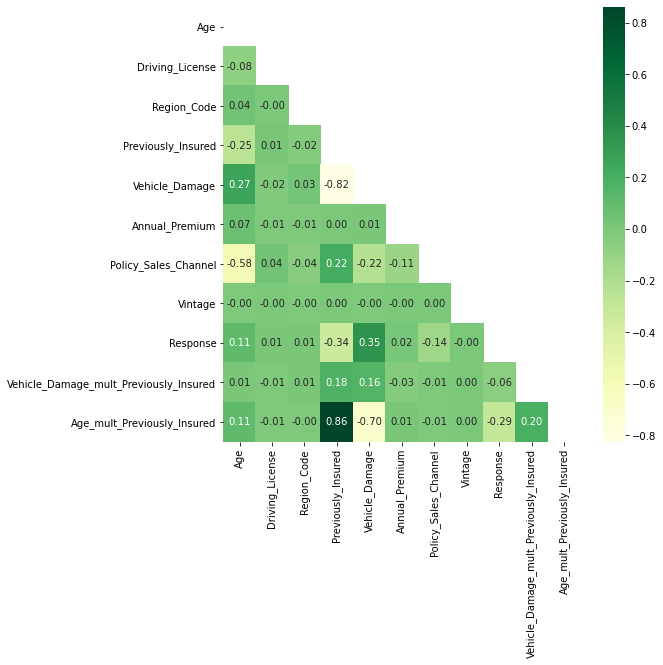

In [10]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
sns.heatmap(df2.corr(), cmap='YlGn', mask=mask, annot=True, fmt='.2f');

In [11]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License','Vehicle_Damage_mult_Previously_Insured']
numeric = ['Age','Vintage','Annual_Premium']

In [12]:
X= df2.drop(columns='Response')
y= df2.Response

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((304887, 12), (76222, 12), (304887,), (76222,))

In [14]:
from imblearn import over_sampling, under_sampling

X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

In [17]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',RandomForestClassifier(n_jobs=-1,random_state=42))
])

best_model = RandomizedSearchCV(pipline,rsp.rf_params,cv=3,n_jobs=-1,verbose=1,n_iter=100,random_state=42,scoring='f1')
best_model.fit(X_under,y_under)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.5min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Age',
                                                                                'Vintage',
                                                                                'Annual_Premium']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(stra

In [18]:
print(best_model.score(X_train, y_train),best_model.score(X_test, y_test))
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

0.4282890987790535 0.4321071204137864
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



In [56]:
print(model.score(X_train, y_train),model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

0.8039097623635196 0.8004709912224363
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      9346
           1       0.74      0.93      0.82      9338

    accuracy                           0.80     18684
   macro avg       0.82      0.80      0.80     18684
weighted avg       0.82      0.80      0.80     18684



In [57]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.801


In [37]:
save_model(model,'final_xgboost.pkl')

Model is pickled as model/final_xgboost.pkl


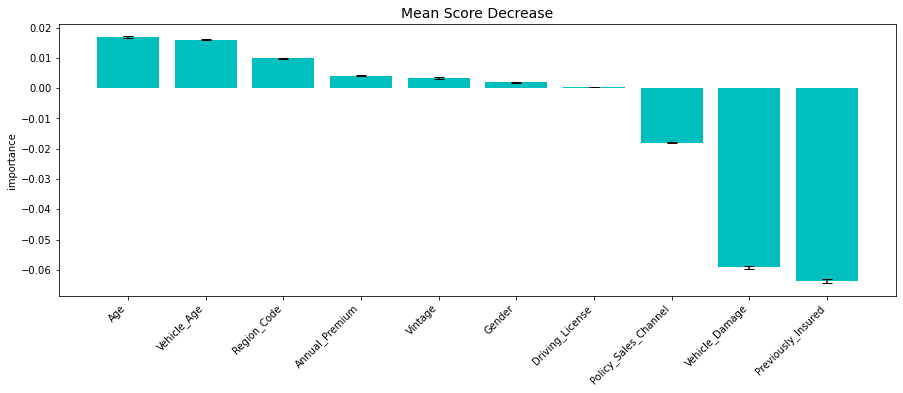

In [30]:
mp = mean_score_decrease(X_train, y_train, model_xgboost, plot=True)

In [31]:
import scikitplot as skplt
from scikitplot.metrics import plot_roc_curve
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [34]:
y_proba = model_xgboost.predict_proba(X_test)

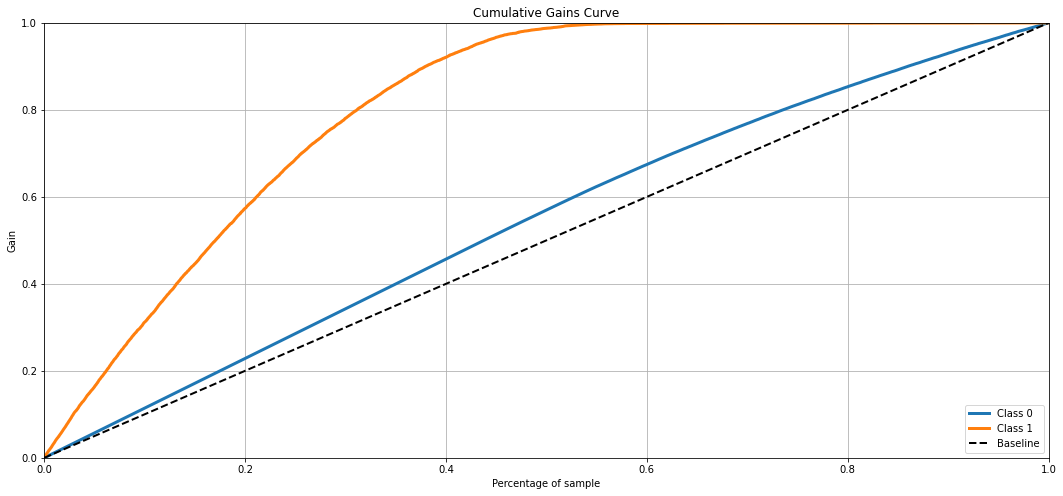

In [35]:
skplt.metrics.plot_cumulative_gain(y_test, y_proba, figsize=(18,8))
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

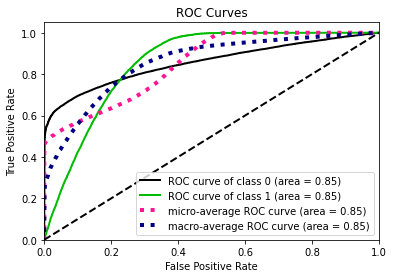

In [36]:
skplt.metrics.plot_roc_curve(y_test, y_proba)

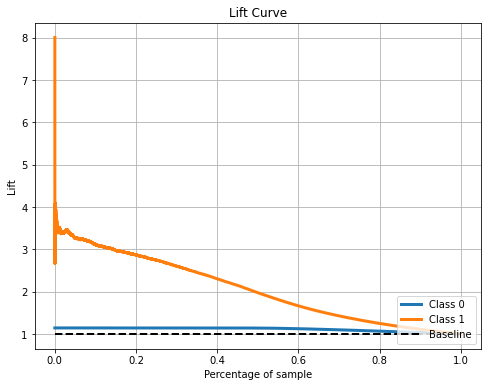

In [38]:
skplt.metrics.plot_lift_curve(y_test, y_proba, figsize=(8,6))
plt.show()

In [39]:
save_model(model_xgboost,'final_xgboost_fix_banget.pkl')

Model is pickled as model/final_xgboost_fix_banget.pkl


##Skenario Targeting

# Skenario Targeting

In [44]:
def lift (test, pred, cardinality):

    res = pd.DataFrame(np.column_stack((test, pred)),
                       columns=['Target','PR_0', 'PR_1'])

    res['scr_grp'] = pd.qcut(res['PR_0'], cardinality, labels=False)+1

    crt = pd.crosstab(res.scr_grp, res.Target).reset_index()
    crt = crt.rename(columns= {'Target':'Np',0.0: 'Negatives', 1.0: 'Positives'})

    G = crt['Positives'].sum()
    B = crt['Negatives'].sum()
   
    avg_resp_rate = G/(G+B)
    
    crt['resp_rate'] = round(crt['Positives']/(crt['Positives']+crt['Negatives']),2)
    crt['lift'] = round((crt['resp_rate']/avg_resp_rate),2)
    crt['rand_resp'] = 1/cardinality
    crt['cmltv_p'] = round((crt['Positives']).cumsum(),2)
    crt['cmltv_p_perc'] = round(((crt['Positives']/G).cumsum())*100,1)
    crt['cmltv_n'] = round((crt['Negatives']).cumsum(),2)  
    crt['cmltv_n_perc'] = round(((crt['Negatives']/B).cumsum())*100,1)   
    crt['cmltv_rand_p_perc'] = (crt.rand_resp.cumsum())*100
    crt['cmltv_resp_rate'] = round(crt['cmltv_p']/(crt['cmltv_p']+crt['cmltv_n']),2)   
    crt['cmltv_lift'] = round(crt['cmltv_resp_rate']/avg_resp_rate,2)
    crt['KS']=round(crt['cmltv_p_perc']-crt['cmltv_rand_p_perc'],2)
    crt = crt.drop(['rand_resp','cmltv_p','cmltv_n',], axis=1)
    
    
    print('average response rate: ' , avg_resp_rate)
    return crt

In [45]:
ModelLift = lift(y_test, y_proba, 12)

average response rate:  0.1249376820340584


In [46]:
y_test3 = y_test.to_frame().reset_index()
y_test3

,id,Response
0,200223,0
1,49767,0
2,172202,0
3,160714,0
4,53273,0
...,...,...
76217,258404,0
76218,234156,0
76219,24477,0
76220,60424,0


In [47]:
probs_df=pd.DataFrame(y_proba)
probs_df['real_values']=y_test3['Response']
probs_df['quantile']=pd.qcut(probs_df[1], 12, labels=False)
probs_df['quantile']=(12-probs_df['quantile'])%13
probs_df

,0,1,real_values,quantile
0,0.999477,0.000523,0,12
1,0.294920,0.705080,0,3
2,0.227194,0.772806,0,2
3,0.724805,0.275195,0,6
4,0.309444,0.690556,0,4
...,...,...,...,...
76217,0.522170,0.477830,0,5
76218,0.994749,0.005251,0,8
76219,0.999574,0.000426,0,12
76220,0.998518,0.001482,0,10


In [48]:
quantilethreshold=probs_df.groupby('quantile')[['real_values']].sum()
quantilethreshold['size']=probs_df.groupby('quantile')['real_values'].count()
quantilethreshold['quantile_threshold']=probs_df.groupby('quantile')[1].min()

quantilethreshold

,real_values,size,quantile_threshold
quantile,,,
1,2540,6352,0.813230
2,2135,6352,0.763403
3,1859,6352,0.704875
4,1410,6351,0.609991
5,987,6352,0.449913
6,474,6352,0.192357
7,107,6352,0.010711
8,3,6351,0.003702
9,3,6352,0.002122


In [49]:
dec = ['Bulan 1','Bulan 2','Bulan 3','Bulan 4','Bulan 5','Bulan 6','Bulan 7','Bulan 8','Bulan 9','Bulan 10','Bulan 11','Bulan 12']
MLift=ModelLift[['Positives','Negatives','cmltv_lift','KS','cmltv_resp_rate']].copy()
MLift.index = (dec)

In [50]:
MLift['Baseline'] = MLift['Positives'].sum()/12
MLift

Target,Positives,Negatives,cmltv_lift,KS,cmltv_resp_rate,Baseline
Bulan 1,2540,3812,3.20,18.37,0.40,793.583333
Bulan 2,2135,4217,2.96,32.43,0.37,793.583333
Bulan 3,1859,4493,2.72,43.60,0.34,793.583333
Bulan 4,1410,4942,2.48,50.07,0.31,793.583333
Bulan 5,987,5364,2.24,52.13,0.28,793.583333
Bulan 6,474,5878,2.00,48.80,0.25,793.583333
Bulan 7,107,6245,1.68,41.57,0.21,793.583333
Bulan 8,3,6349,1.52,33.23,0.19,793.583333
Bulan 9,3,6348,1.36,24.90,0.17,793.583333
Bulan 10,2,6350,1.20,16.67,0.15,793.583333


<AxesSubplot:>

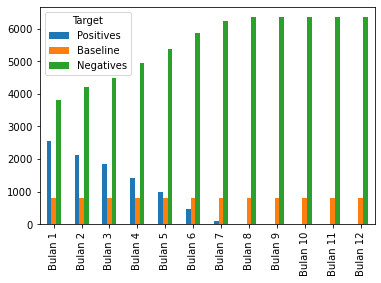

In [51]:
MLift[['Positives','Baseline','Negatives']].plot(kind='bar')

<AxesSubplot:>

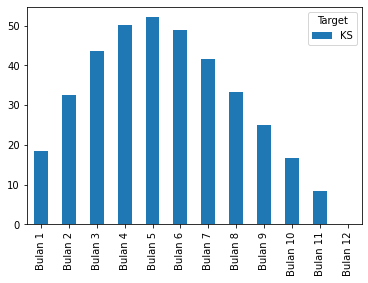

In [52]:
MLift[['KS']].plot(kind='bar')

In [54]:
import waterfall_chart

# Waterfall Chart

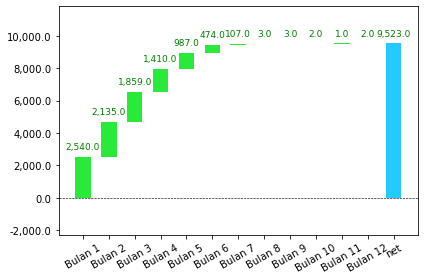

In [55]:
a = ['Bulan 1','Bulan 2','Bulan 3','Bulan 4','Bulan 5','Bulan 6','Bulan 7','Bulan 8','Bulan 9','Bulan 10','Bulan 11','Bulan 12']
b = MLift['Positives']
c = [778,778,778,778,778,778,778,778,778,778,778,778]
waterfall_chart.plot(a, b)
plt.grid(False)
plt.show()

In [40]:
xb = load_model("model/final_xgboost_fix_banget.pkl")

In [41]:
X= df.drop(columns='Response')
y= df.Response

In [42]:
y_pred = xb.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80    334399
           1       0.29      0.94      0.44     46710

    accuracy                           0.71    381109
   macro avg       0.64      0.81      0.62    381109
weighted avg       0.90      0.71      0.76    381109



ValueError: Found input variables with inconsistent numbers of samples: [18684, 381109]

In [57]:
from jcopml.plot import plot_confusion_matrix

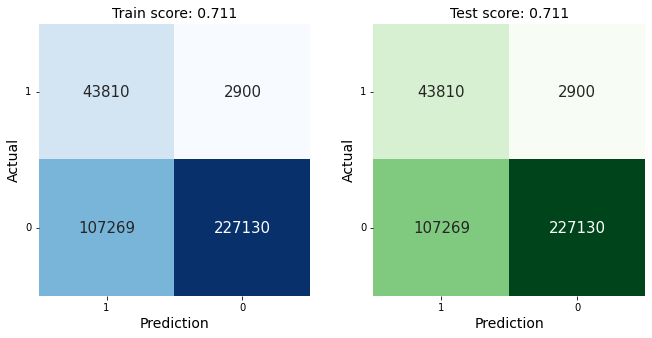

In [58]:
plot_confusion_matrix(X, y,X,y, xb)

In [47]:
import scikitplot as skplt
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [48]:
y_proba = xb.predict_proba(X)

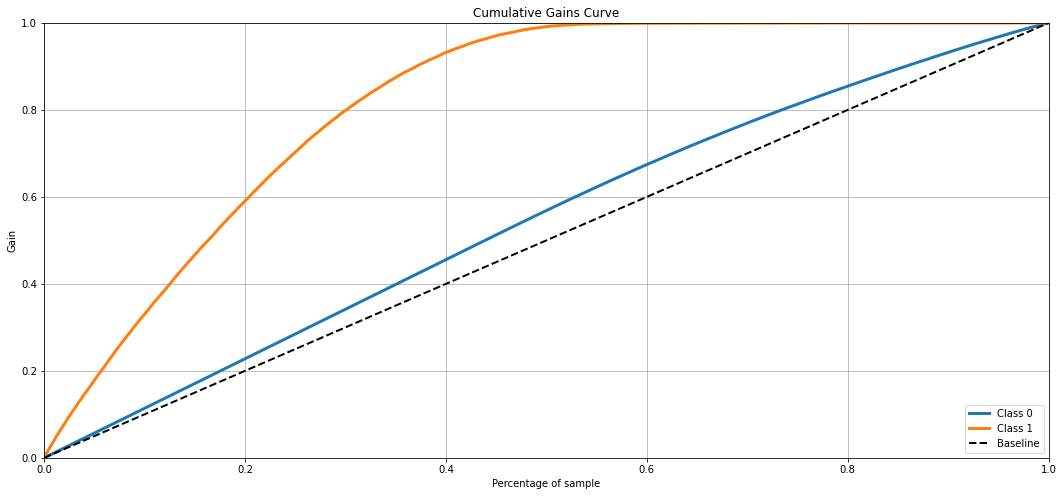

In [49]:
skplt.metrics.plot_cumulative_gain(y, y_proba, figsize=(18,8))
plt.show()

In [77]:
data_test = pd.read_csv('test-Copy1.csv')
data_test.count()[['id']]

id    127039
dtype: int64

In [81]:
y_pred = xb.predict(data_test)

In [82]:
pred = pd.DataFrame(y_pred)

In [83]:
data_test['predict'] = pred

In [84]:
data_test[data_test.predict == 1].count()[['id']]

id    50259
dtype: int64